In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сделаем по 10 замеров для каждого P из {1, 2, 4, 8, 16} и 10 замеров быстрой сортировки с начальными параметрами n = 2500000 и m = 5

In [2]:
stats1 = open('stats1.txt', 'r')

#Время работы программы без использования omp
T = [float(str(line)[:-2]) for line in stats1]
print(T)
t = np.mean(T)

stats1.close()

[0.7635, 0.76091, 0.7598, 0.75909, 0.76184, 0.76291, 0.75933, 0.76356, 0.76189, 0.75868]


In [4]:
stats = open('stats.txt', 'r')

# Время работы программы на {1, 2, 4, 8, 16} потоках и время быстрой сортировки соответственно

T1, T2, T3, T4, T5, Q = [], [], [], [], [], []
lines = [float(str(line[:-2])) for line in stats]
for i in range(10):
    T1.append(lines[6 * i])
    T2.append(lines[6 * i + 1])
    T3.append(lines[6 * i + 2])
    T4.append(lines[6 * i + 3])
    T5.append(lines[6 * i + 4])
    Q.append(lines[6 * i + 5])

print(T1)
print(T2)
print(T3)
print(T4)
print(T5)
print(Q)

t1 = np.mean(T1)
t2 = np.mean(T2)
t3 = np.mean(T3)
t4 = np.mean(T4)
t5 = np.mean(T5)
q = np.mean(Q)

stats.close()

[1.66971, 1.14338, 1.82564, 1.43509, 1.59512, 1.58182, 1.65364, 1.4963, 1.88511, 1.60816]
[0.43919, 0.43916, 0.48766, 0.44528, 0.44156, 0.49865, 0.44277, 0.4488, 0.44618, 0.46723]
[0.35597, 0.3468, 0.34943, 0.35401, 0.35607, 0.34834, 0.35342, 0.34593, 0.36784, 0.35286]
[0.37623, 0.36945, 0.40503, 0.37638, 0.37585, 0.36954, 0.37948, 0.36983, 0.37269, 0.38467]
[0.36309, 0.37021, 0.3659, 0.37148, 0.37113, 0.36601, 0.36824, 0.37023, 0.37319, 0.37559]
[0.5011, 0.49833, 0.50827, 0.49713, 0.49734, 0.49879, 0.49682, 0.50882, 0.49834, 0.49716]


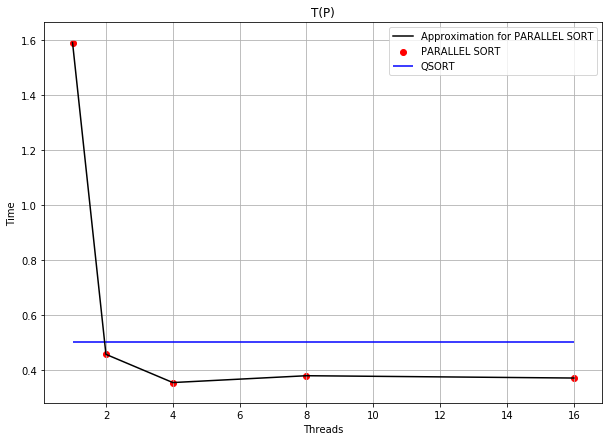

In [5]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, y, "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, y, c='red', label='PARALLEL SORT')
plt.hlines(q, 1, 16, color='blue', label='QSORT')

plt.xlabel("Threads")
plt.ylabel("Time")

plt.title("T(P)")
plt.grid()
plt.legend()
plt.show()

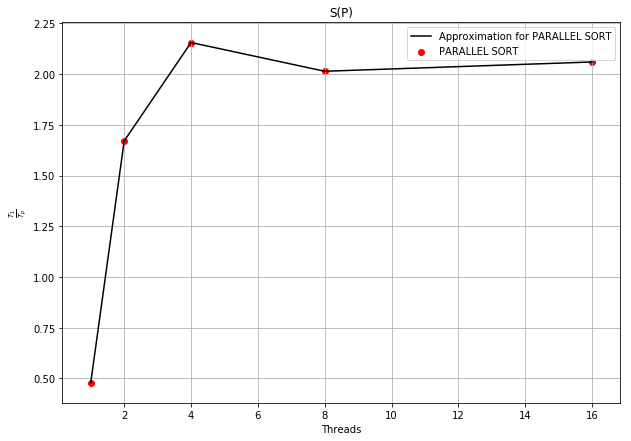

In [6]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, t / y, "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, t / y, c='red', label='PARALLEL SORT')

plt.xlabel("Threads")
plt.ylabel(r"$\frac{T_1}{T_p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()

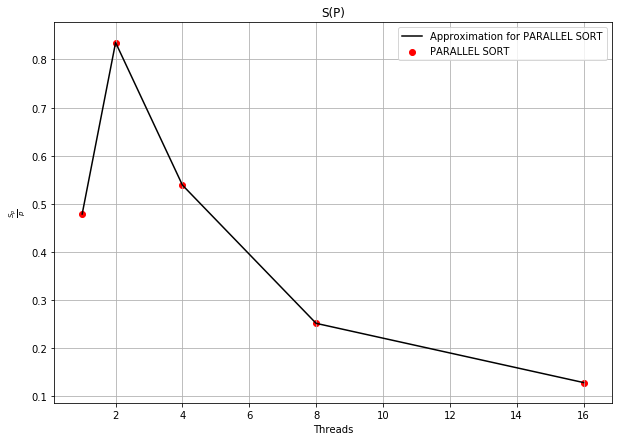

In [7]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, t / (x * y), "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, t / (x * y), c='red', label='PARALLEL SORT')

plt.xlabel("Threads")
plt.ylabel(r"$\frac{S_p}{p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()